In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import mpl_interactions as pli

In [2]:
import fastcat as fc

### Write a small nrrd brain volume 

Nrrd is a common 3d image format. I use 3D slicer to manipulate dicom images and then export them as nrrd, nrrd is the default image export file type.

In [15]:
# This is the file that contains the conversion values from HU to density and material
conversion_file = 'schneider_material_conv.txt'

density_map, binary_file, density_file  = fc.utils.nrrd_to_mhd('data/smaller_volume_CNS_CT.nrrd',conversion_file=conversion_file, return_arrays=True)

[2024-03-20 15:59:52,182] {utils.py:319} INFO - Loading density data from file
[2024-03-20 15:59:52,188] {utils.py:569} INFO -     Saved SchneiderMaterialsWeight1 atten to file in data/mu_over_rho/SchneiderMaterialsWeight1.csv
[2024-03-20 15:59:52,188] {utils.py:319} INFO - Loading density data from file
[2024-03-20 15:59:52,192] {utils.py:569} INFO -     Saved SchneiderMaterialsWeight2 atten to file in data/mu_over_rho/SchneiderMaterialsWeight2.csv
[2024-03-20 15:59:52,193] {utils.py:319} INFO - Loading density data from file
[2024-03-20 15:59:52,197] {utils.py:569} INFO -     Saved SchneiderMaterialsWeight3 atten to file in data/mu_over_rho/SchneiderMaterialsWeight3.csv
[2024-03-20 15:59:52,197] {utils.py:319} INFO - Loading density data from file
[2024-03-20 15:59:52,202] {utils.py:569} INFO -     Saved SchneiderMaterialsWeight4 atten to file in data/mu_over_rho/SchneiderMaterialsWeight4.csv
[2024-03-20 15:59:52,202] {utils.py:319} INFO - Loading density data from file
[2024-03-20 1

/home/jericho/Software/fastcat/fastcat/spectrum.py:108: RuntimeWarning: divide by zero encountered in log
  log_y = np.log(yy)


Plot the density and the materials

(-0.5, 344.5, 299.5, -0.5)

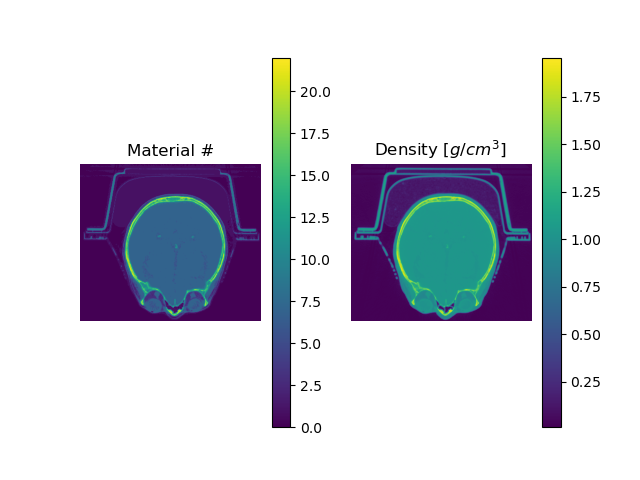

In [19]:

plt.figure()
plt.subplot(121)
cont = pli.hyperslicer(binary_file.T)
plt.title('Material #')
# These correspond to the material numbers in the conversion file
plt.colorbar()
plt.axis('off')
plt.subplot(122)
cont2 = pli.hyperslicer(density_file.T,controls=cont)
plt.title('Density [$g/cm^3$]')
plt.colorbar()
plt.axis('off')

Text(0.5, 1.0, 'Density HU conversion')

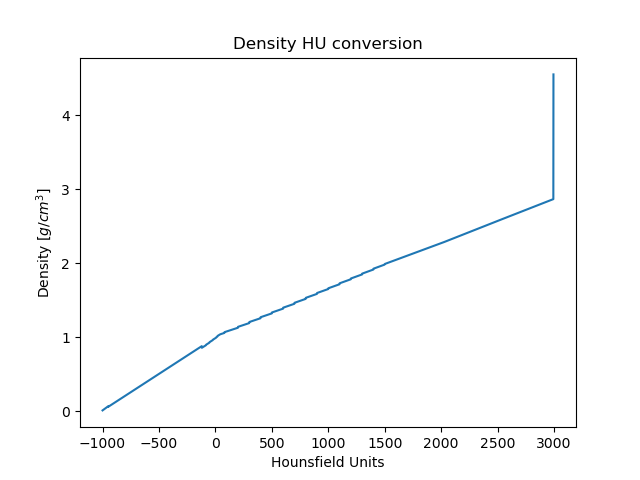

In [22]:
plt.figure()
plt.plot(np.arange(-1000,2996),density_map)
plt.xlabel('Hounsfield Units')
plt.ylabel('Density [$g/cm^3$]')
plt.title('Density HU conversion')